# Assignment 3: Tree Search

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parents. 
* Depth-limited search needs ideas from best-first search to work with open spaces!
* Some better data structures could be used (heaps).

__Fixme:__ DFS should check nodes in the frontier.


Position(0,0): X
Position(8,1):  


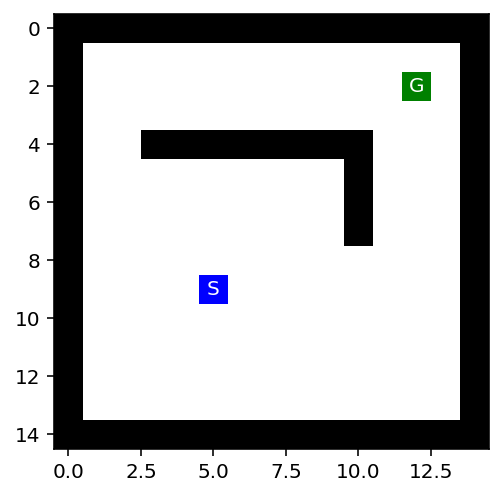

In [33]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

# tree_search.py has my actual implementation
from tree_search import *
import tree_search


#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

## Heuristics

Heuristics $h(n)$

In [34]:
def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
print(manhattan((0,0), (1,1)))

2


In [35]:
def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

print(euclidean([0,0], [1,1]))

1.4142135623730951


In [36]:
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

## Implementation

Implementation is in [tree_search.py](tree_search.py)

## Experiments

### BFS

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 8.22 ms, sys: 276 µs, total: 8.49 ms
Wall time: 7.68 ms
Path length: 14
Reached squares: 142


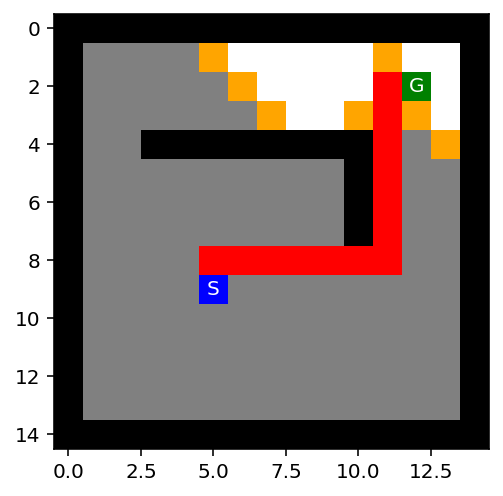

['N', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E']

In [37]:
tree_search.set_order("NESW")
#tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False)
show_path(maze, result)
result['actions']

Directions are checked at every step in random order.
CPU times: user 5.34 ms, sys: 435 µs, total: 5.77 ms
Wall time: 5.72 ms
Path length: 14
Reached squares: 139


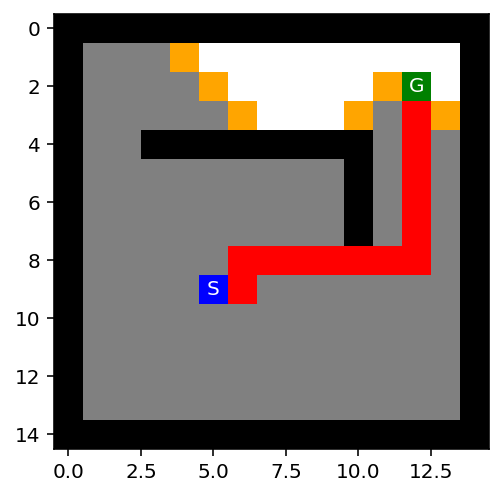

['E', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N']

In [6]:
#tree_search.set_order("NESW")
tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False)
show_path(maze, result)
result['actions']

### DFS

Use the tree search implementation from BFS and just change the order in which the frontier is explored. 

__Important Notes:__ 
* This implementation keeps the whole search tree in memory (reached structure) and has space complexity of  $O(b^m)$ ($m$ is the longest path in the search tree) which is worse than BFS's  $O(b^d)$ ($d$ is the depth of the shallowest goal state)!
* The time complexity is worse than BFS (even though the runtime is better for this problem).

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 1.64 ms, sys: 480 µs, total: 2.12 ms
Wall time: 2.12 ms
Path length: 48
Reached squares: 92


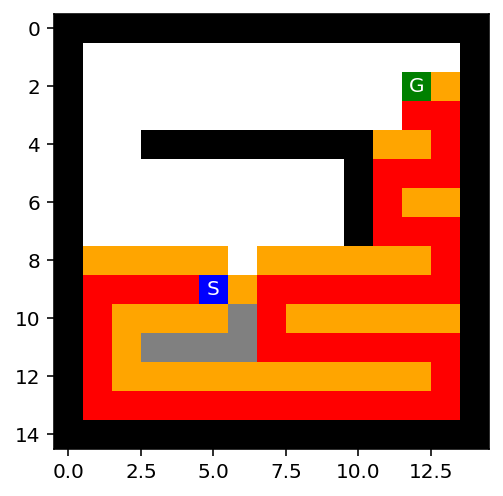

In [7]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
# We can alter the order in which the directions are added to the frontier

tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)


%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 755 µs, sys: 205 µs, total: 960 µs
Wall time: 965 µs
Path length: 24
Reached squares: 49


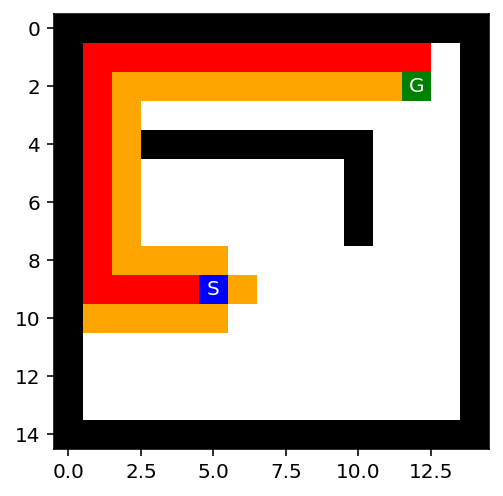

In [8]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 985 µs, sys: 247 µs, total: 1.23 ms
Wall time: 1.24 ms
Path length: 20
Reached squares: 45


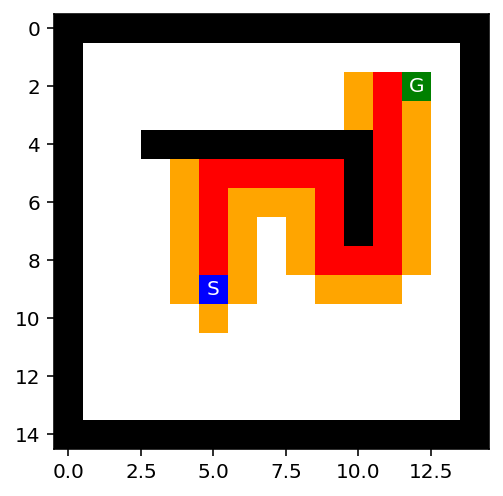

In [9]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 3.13 ms, sys: 0 ns, total: 3.13 ms
Wall time: 3.14 ms
Path length: 52
Reached squares: 104


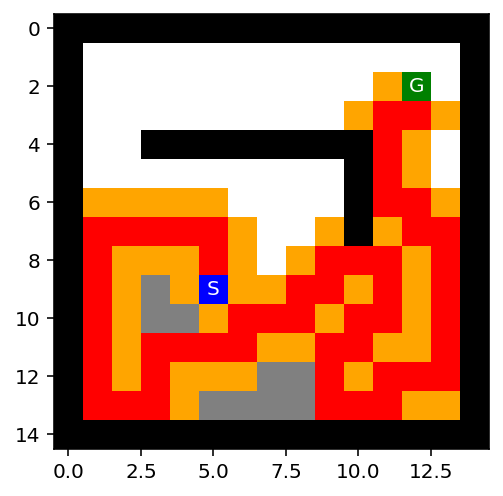

In [10]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

### DFS with no reached data structure

This has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

CPU times: user 8.46 ms, sys: 91 µs, total: 8.55 ms
Wall time: 7.99 ms
Path length: 60
Reached squares: 94


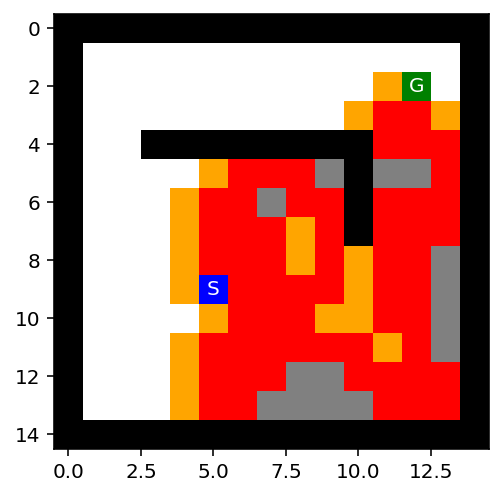

In [11]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empy maze since cycle checking is not string enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True)

#result
show_path(maze, result)
if result['path'] is None:
    print("No solution found!")

We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

Directions are checked at every step in random order.
CPU times: user 36.7 ms, sys: 105 µs, total: 36.8 ms
Wall time: 35.1 ms
Path length: 454
Reached squares: 105


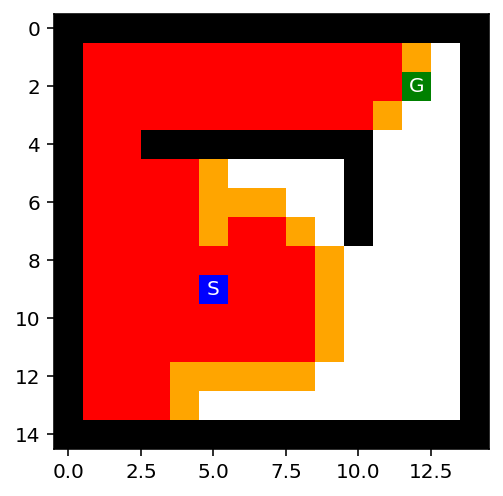

In [12]:
tree_search.set_order(random = True)
%time result = DFS(maze, check_cycle = False, max_tries = 100000, vis = False, debug_reached = True)

#result
show_path(maze, result)
if result['path'] is None:
    print("No solution found!")

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 758 ms, sys: 127 µs, total: 758 ms
Wall time: 756 ms
Solutions have path_lengths of [50, 60, 32, 66, 64, 66, 60, 68, 28, 60, 104, 50, 56, 90, 98, 80, 86, 40, 52, 46, 66, 76, 84, 44, 48, 70, 44, 104, 44, 70, 78, 52, 68, 66, 40, 36, 62, 86, 54, 40, 72, 56, 70, 82, 64, 70, 64, 90, 70, 64, 38, 66, 58, 100, 78, 44, 60, 48, 48, 72, 46, 84, 72, 72, 52, 84, 40, 72, 46, 56, 100, 52, 70, 58, 60, 64, 74, 54, 52, 62, 50, 60, 90, 96, 38, 38, 74, 64, 42, 52, 84, 62, 40, 50, 52, 82, 74, 50, 86, 44]
Path length: 28
Reached squares: 0


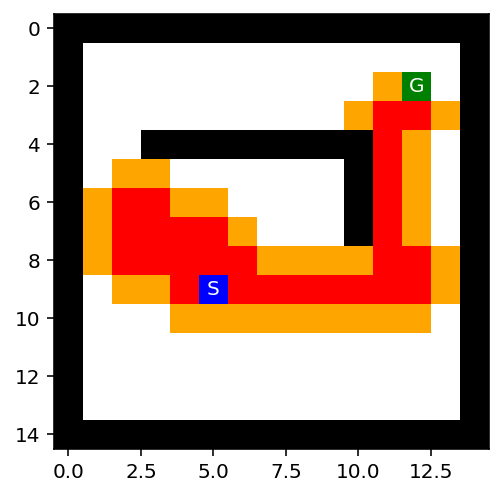

In [13]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

DFS does not store the explored search tree for visualization so we show it using the tree search implementation.

Directions are checked at every step in random order.
CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 2.16 ms
Reached squares: 58


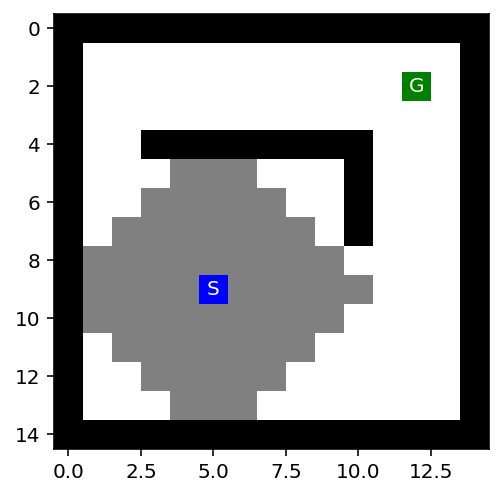

In [14]:
tree_search.set_order(random = True)

#%time result = DFS(maze, limit = 10, debug = False, vis = False)
%time result = best_first_search(maze, strategy = "DFS", limit = 5, debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 2.09 ms, sys: 297 µs, total: 2.38 ms
Wall time: 2.39 ms
Reached squares: 57


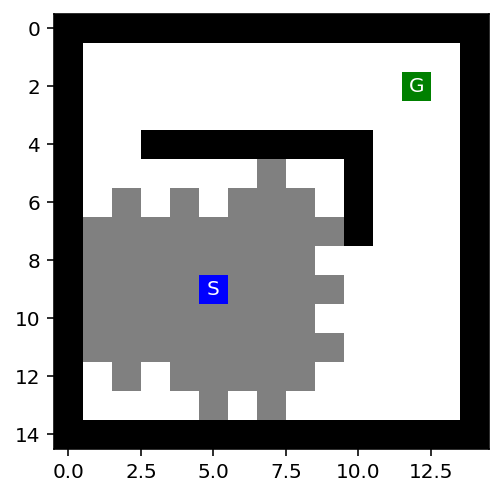

In [15]:
#tree_search.set_order(random=True)
tree_search.set_order("NESW")

%time result = DFS(maze, limit = 5, vis = False, debug_reached = True)
show_path(maze, result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 166 ms, sys: 4.11 ms, total: 170 ms
Wall time: 169 ms
Path length: 26
Reached squares: 0


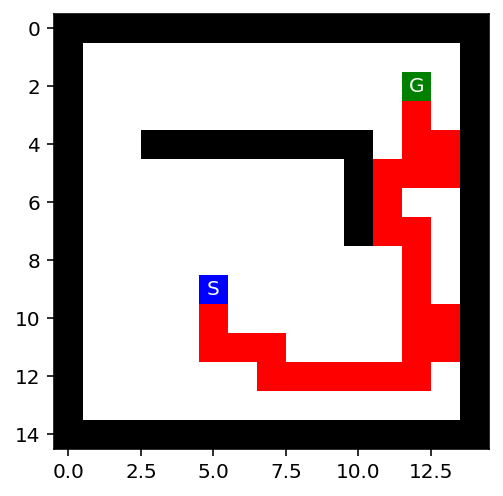

In [16]:
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 118 ms, sys: 102 µs, total: 118 ms
Wall time: 116 ms
Path length: 14
Reached squares: 142


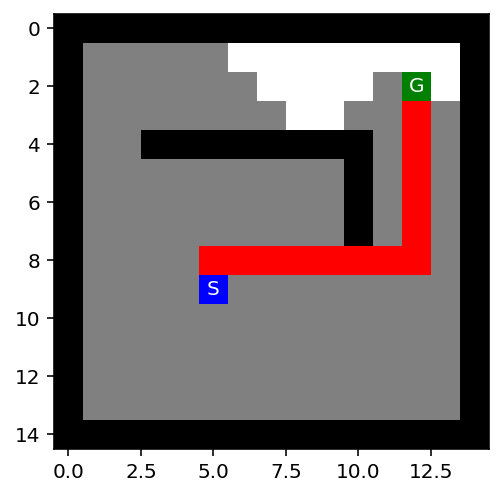

In [17]:
# Use a reached structure. This does not use DFS in the proper way.

#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS_reached(maze, debug = False)
show_path(maze, result)

### GBFS

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 1.6 ms, sys: 204 µs, total: 1.8 ms
Wall time: 1.81 ms
Path length: 14
Reached squares: 40


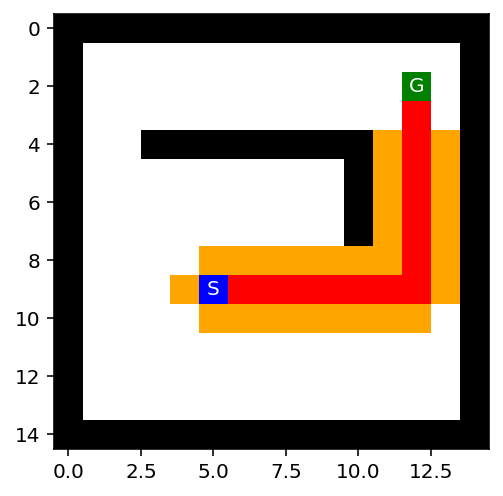

In [18]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 2.19 ms, sys: 271 µs, total: 2.46 ms
Wall time: 2.47 ms
Path length: 20
Reached squares: 46


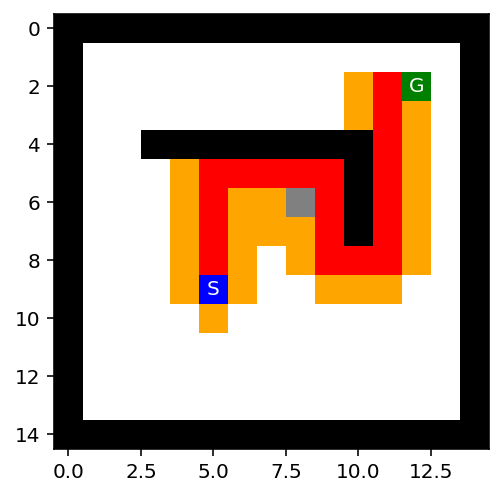

In [19]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 3.47 ms, sys: 0 ns, total: 3.47 ms
Wall time: 3.48 ms
Path length: 16
Reached squares: 42


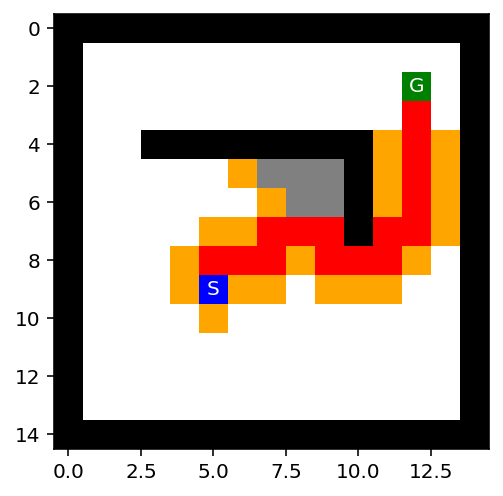

In [20]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
show_path(maze, result)

### A* Search

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 2.01 ms
Path length: 14
Reached squares: 40


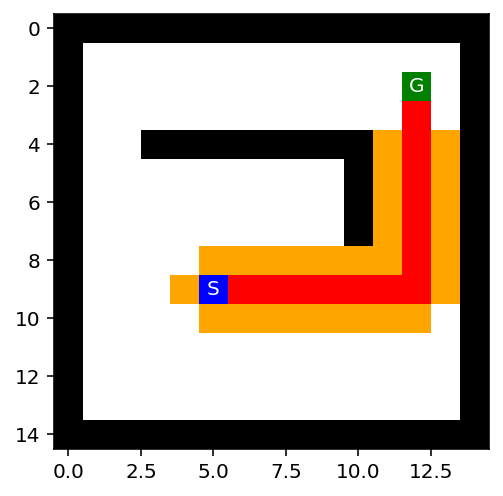

In [21]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 3.61 ms, sys: 0 ns, total: 3.61 ms
Wall time: 3.61 ms
Path length: 14
Reached squares: 49


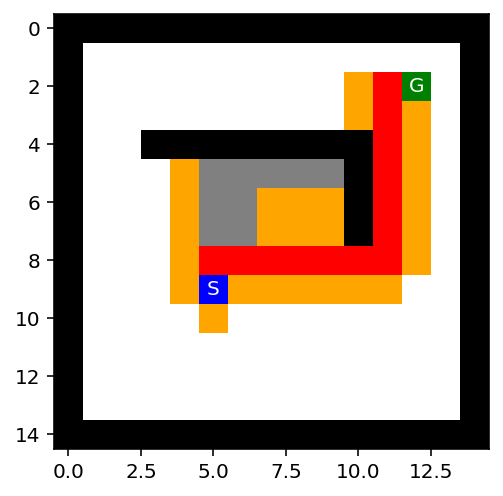

In [22]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 3.36 ms, sys: 0 ns, total: 3.36 ms
Wall time: 3.37 ms
Path length: 14
Reached squares: 48


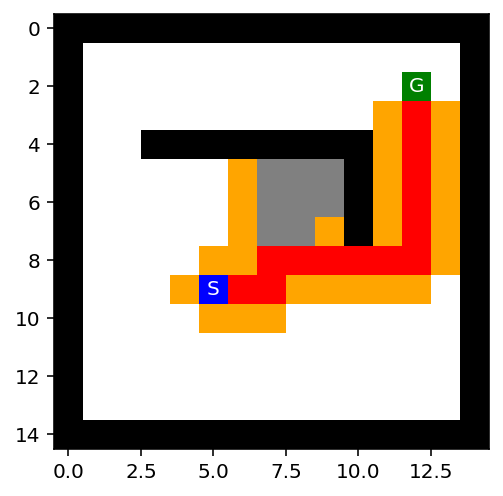

In [23]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False)
show_path(maze, result)

### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

Directions are checked at every step in random order.
CPU times: user 3.88 ms, sys: 0 ns, total: 3.88 ms
Wall time: 3.89 ms
Path length: 14
Reached squares: 45


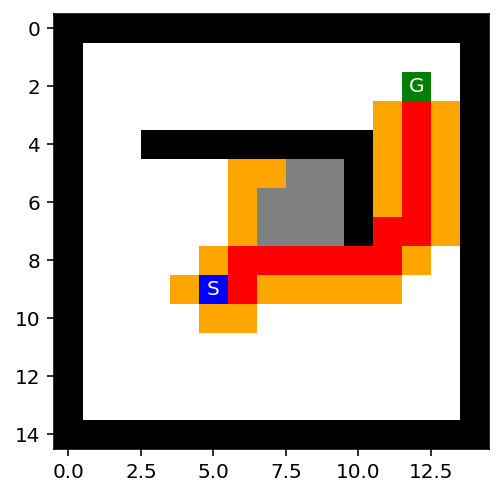

In [24]:
tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False)
show_path(maze, result)

CPU times: user 2.64 ms, sys: 0 ns, total: 2.64 ms
Wall time: 2.65 ms
Path length: 14
Reached squares: 43


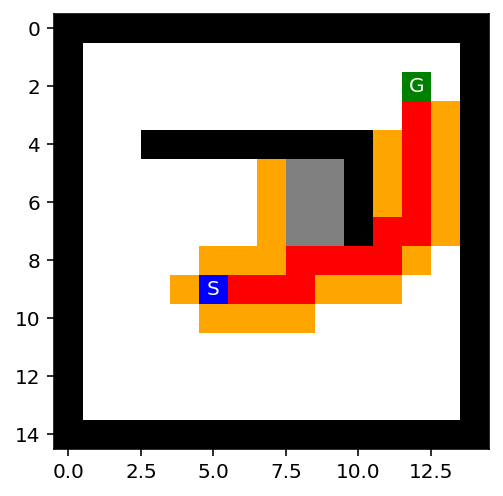

In [25]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False)
show_path(maze, result)

CPU times: user 732 µs, sys: 3.23 ms, total: 3.96 ms
Wall time: 3.62 ms
Path length: 20
Reached squares: 50


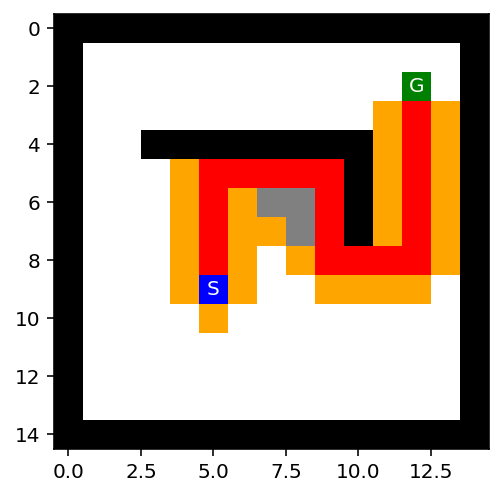

In [26]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False)
show_path(maze, result)

$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

CPU times: user 7.92 ms, sys: 0 ns, total: 7.92 ms
Wall time: 7.78 ms
Path length: 14
Reached squares: 64


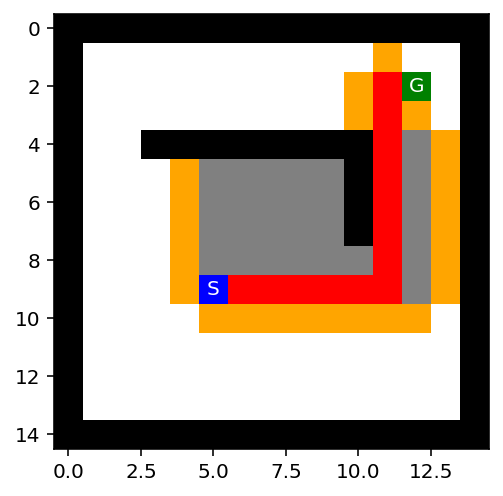

In [27]:
%time result = best_first_search(maze, strategy = "A*", W = 1-1e-9, debug = False, vis = False)
show_path(maze, result)

CPU times: user 25.4 ms, sys: 120 µs, total: 25.5 ms
Wall time: 24.9 ms
Path length: 14
Reached squares: 138


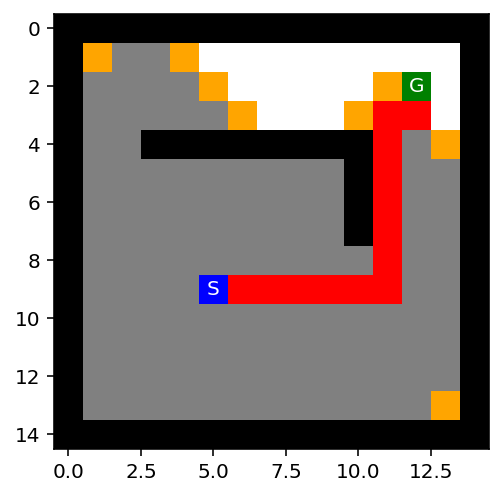

In [28]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False)
show_path(maze, result)

### Compare Timing

In [29]:
#f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")

#maze_str = f.read()
#maze = parse_maze(maze_str)

tree_search.set_order(random=True)


Directions are checked at every step in random order.


In [30]:
import timeit
import math

reps = 50

times = {}

algorithms = ["BFS", "DFS", "GBFS", "A*"]

### FIXME: add IDS

for a in algorithms:
    times[a] = math.ceil(timeit.timeit(stmt = f'best_first_search(maze, strategy = "{a}", debug = False, vis = False)', 
              setup = 'from __main__ import best_first_search, maze',
                    number = reps)*1e3/reps)
    
times['DFS(no reached)'] = math.ceil(timeit.timeit(stmt = f'DFS(maze, vis = False)', 
              setup = 'from __main__ import DFS, maze',
                    number = reps)*1e3/reps)

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.DataFrame(times, index = ["time in ms"])
df

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df.columns, height = df.iloc[0])
plt.ylabel("run time in ms")
plt.show()